In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rcParams["figure.figsize"] = (10,6)

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df["total_spend"] = df.TV+df.radio+df.newspaper
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [5]:
def check_dist(df, var):
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=var)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

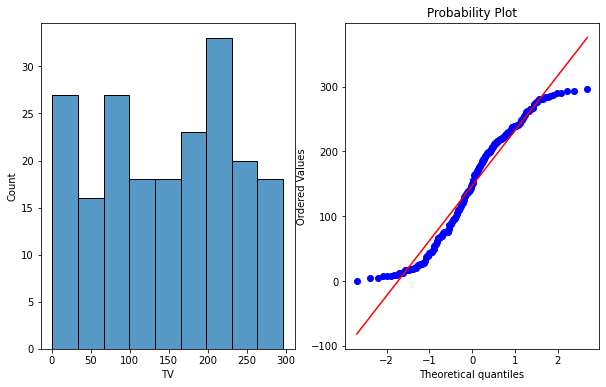

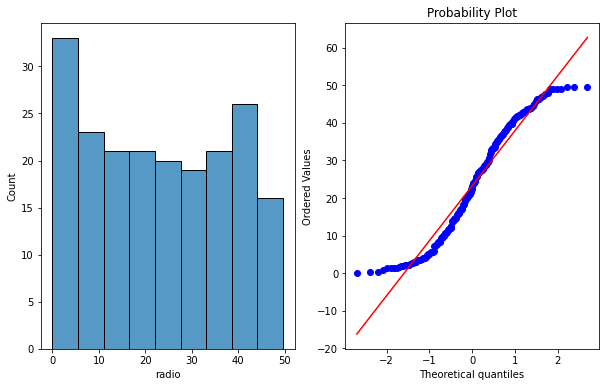

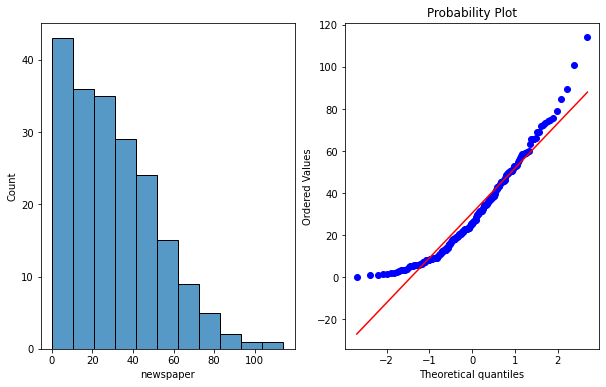

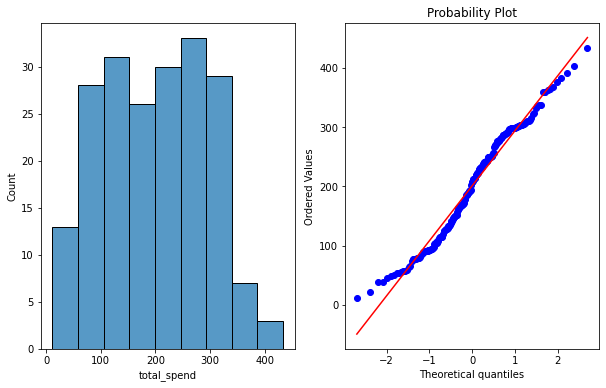

In [6]:
for col in df.drop("sales", axis=1):
    check_dist(df, col)

In [7]:
df = df[["total_spend", "sales"]]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


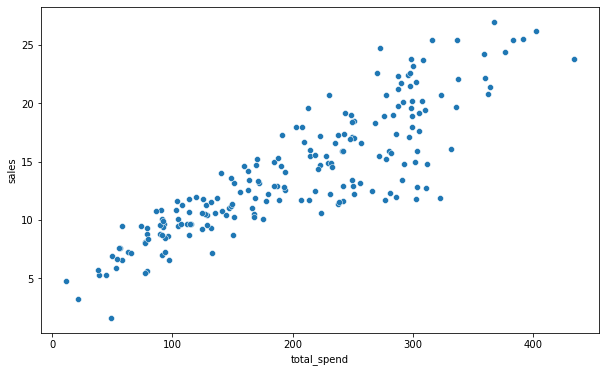

In [9]:
sns.scatterplot(data=df, x="total_spend", y="sales");

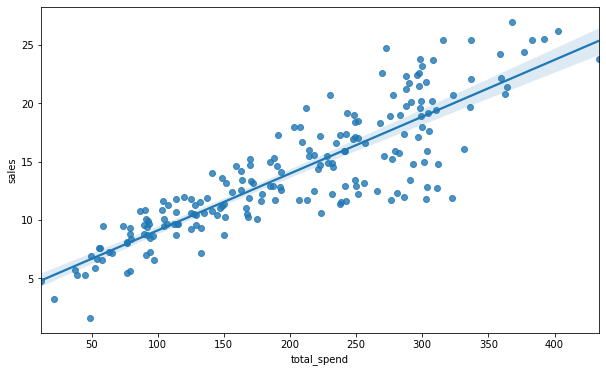

In [10]:
sns.regplot(data=df, x="total_spend", y="sales");

In [13]:
corr = df.sales.corr(df.total_spend)

In [14]:
corr

0.8677123027017427

In [15]:
R2_score = corr**2
R2_score

0.7529246402599608

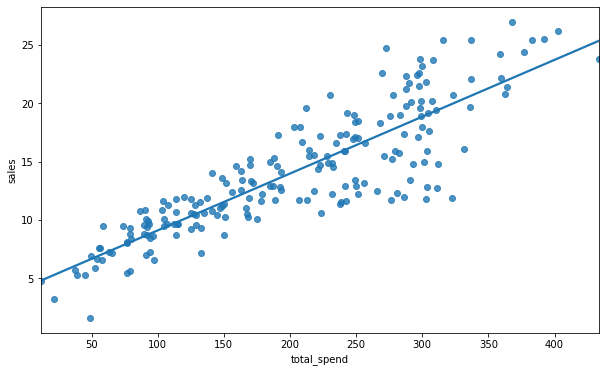

In [17]:
sns.regplot(data=df, x="total_spend", y="sales", ci=None);

In [18]:
X = df.total_spend
y = df.sales

In [19]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [20]:
np.polyfit(X, y, deg=1)[0]

0.04868787931904817

In [21]:
np.polyfit(X, y, deg=1)[1]

4.243028216036326

In [23]:
b1 = np.polyfit(X, y, deg=1)[0]
b0 = np.polyfit(X, y, deg=1)[1]

In [24]:
predict = b1*X + b0
predict

0      20.655712
1      10.518896
2      10.689303
3      16.478292
4      16.414998
         ...    
195     6.954943
196     9.462369
197    13.625183
198    23.318939
199    16.385785
Name: total_spend, Length: 200, dtype: float64

In [26]:
values = {"actuals":y, "predicted":predict, "residual":y-predict, "LSE":(y-predict)**2}

In [28]:
pd.DataFrame(values).head()

,actuals,predicted,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
